# Reconocimiento de patrones

In [35]:
#Librerias
import matplotlib.pyplot as plt
import skimage
from skimage import io
import cv2 as cv
import numpy as np

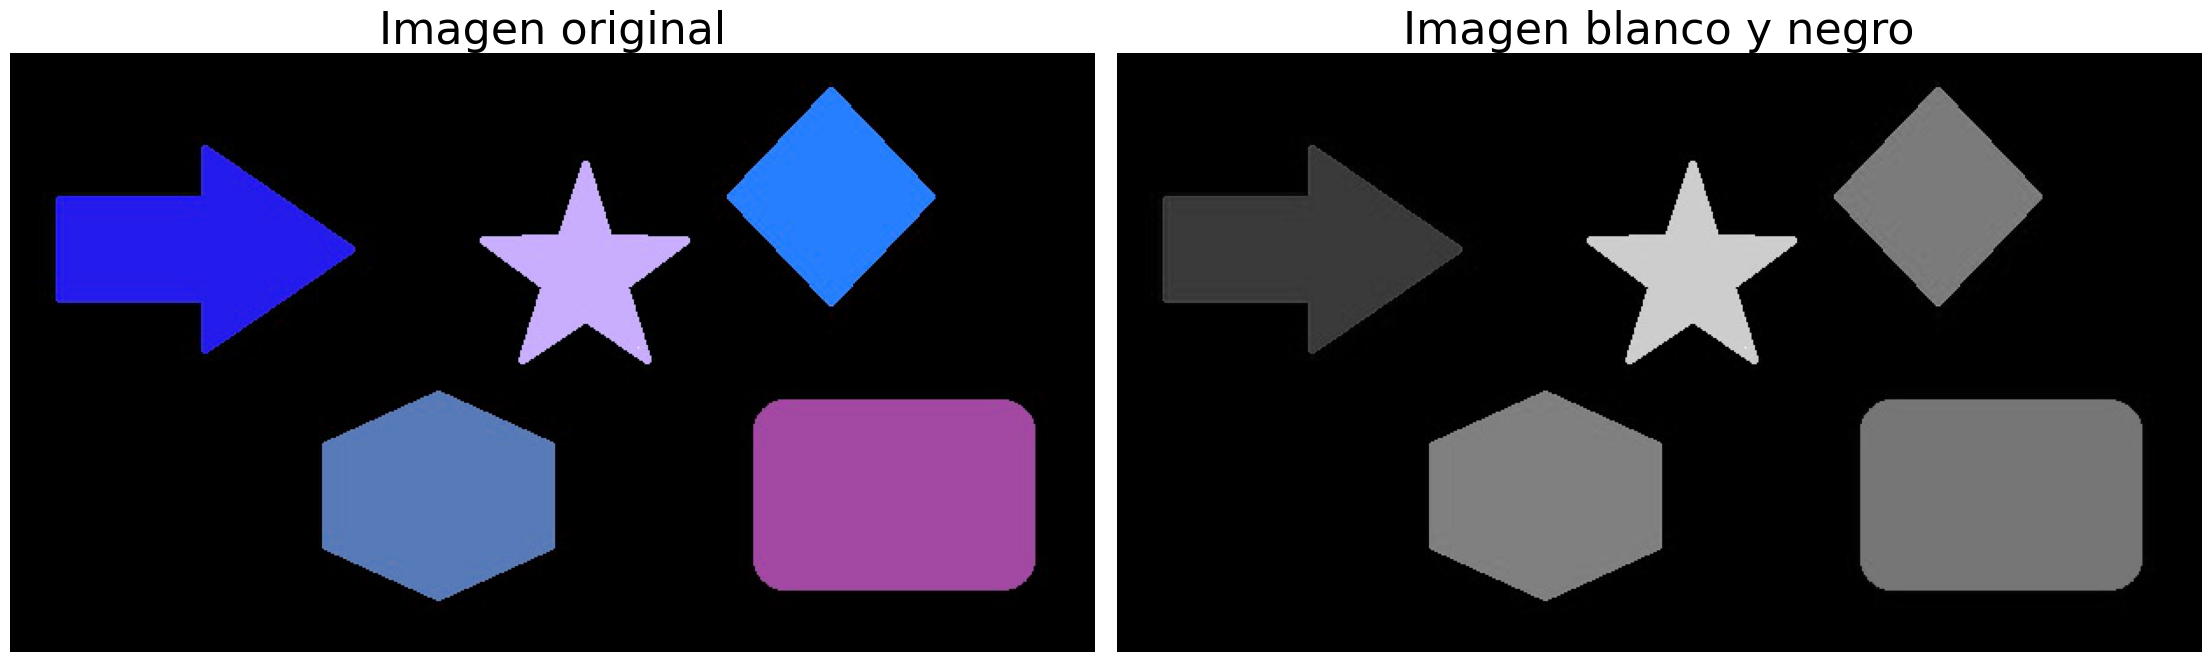

In [36]:
#Leer la imagen
img = cv.imread('a.jpg')

#Convertir la imagen a escala de grises
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)


fig, axes = plt.subplots(1, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0].imshow(img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Imagen original', fontsize=32)

axes[1].imshow(gray, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Imagen blanco y negro', fontsize=32)
plt.show()


Text(0.5, 1.0, 'Binarización de la imagen')

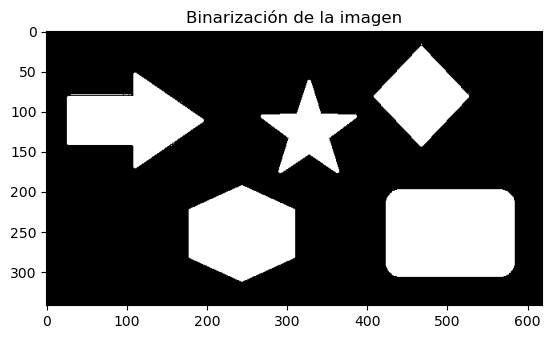

In [37]:
# Binarización de la imagen
ret,thresh = cv.threshold(gray,10,255,0)
# Visualización
plt.imshow(thresh, cmap='gray')
plt.title('Binarización de la imagen')

Text(0.5, 1.0, 'Bounding box')

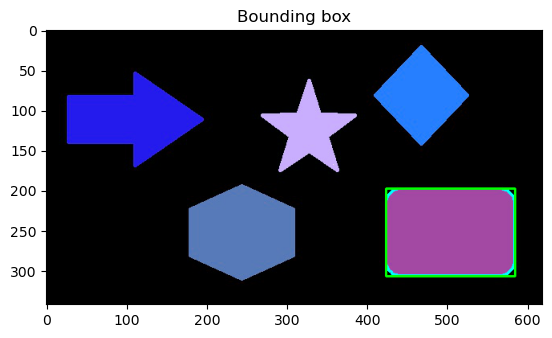

In [38]:
# Encontrar los contornos de uno de los objetos
contours, _ = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

# Tomar el primer contorno
cnt = contours[0]

# Calcular bounding box para el primer contorno
x,y,w,h = cv.boundingRect(cnt)

# Dibujar contorno
img = cv.drawContours(img,[cnt],0,(0,255,255),2)

# Dibujar el rectángulo alrededor del contorno
img = cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# Visualizar
plt.imshow(img)
plt.title('Bounding box')

In [33]:
#Ahora, también es posible extraer características de la imagen
contours,hierarchy = cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
print("Número de contornos en la imagen:",len(contours))
cnt = contours[0]

# Cálculo del área y el perímetro
area = cv.contourArea(cnt)
perimetro = cv.arcLength(cnt, True)
perimetro = round(perimetro, 4)
print('Área:', area)
print('Perimetro:', perimetro)

Número de contornos en la imagen: 12
Área: 17013.0
Perimetro: 513.7401


In [158]:
#ETIQUETADO DE TODOS LOS OBJETOS Y CARACTERÍSTICAS
import cv2
import numpy as np

img1 = cv2.imread('a.jpg')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,40,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
print("Número de contornos en la imagen:",len(contours))

for i, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    if M['m00'] != 0.0:
        x1 = int(M['m10']/M['m00'])
        y1 = int(M['m01']/M['m00'])
        x2,y2,w2,h2 = cv.boundingRect(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    perimeter = round(perimeter, 4)
    print(f'CONTORNO {i+1}:')
    print(f'Área del contorno {i+1}:', area)
    print(f'Perimetro del contorno {i+1}:', perimeter)
    img1 = cv.rectangle(img1,(x2,y2),(x2+w2,y2+h2),(255,0,125),2)
    img1 = cv2.drawContours(img1, [cnt], -1, (0,255,255), 3)
    #cv2.putText(img1, f'Área :{area}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    #cv2.putText(img1, f'Perimetro :{perimeter}', (x1, y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.putText(img1, f'{i+1}', (x1, y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (125, 0, 0), 2)



Número de contornos en la imagen: 5
CONTORNO 1:
Área del contorno 1: 17003.5
Perimetro del contorno 1: 511.9828
CONTORNO 2:
Área del contorno 2: 11826.0
Perimetro del contorno 2: 431.7056
CONTORNO 3:
Área del contorno 3: 5214.5
Perimetro del contorno 3: 472.86
CONTORNO 4:
Área del contorno 4: 10377.0
Perimetro del contorno 4: 504.5341
CONTORNO 5:
Área del contorno 5: 7562.0
Perimetro del contorno 5: 348.0975


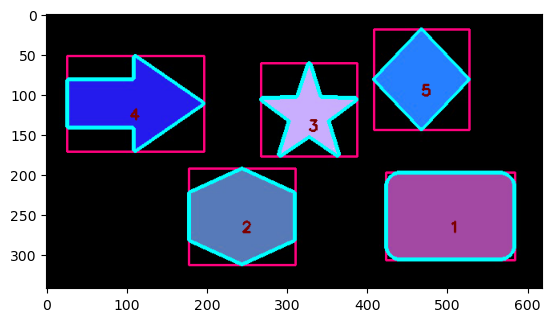

In [159]:
plt.imshow(img1)